In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# https://www.kaggle.com/datasets/barun2104/telecom-churn

In [3]:
df = pd.read_csv('telecom_churn.csv')

In [4]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [143]:
customer = ['activate' if i == 0 else 'desactived' for i in df['Churn']]

In [144]:
df['customer'] = customer

In [145]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


<b>Churn</b> = 1 if customer cancelled service, 0 if not

<b>AccountWeeks</b> = number of weeks customer has had active account

<b>ContractRenewal</b> = 1 if customer recently renewed contract, 0 if not

<b>DataPlan</b> = 1 if customer has data plan, 0 if not

<b>DataUsage</b> = gigabytes of monthly data usage

<b>CustServCalls</b> = number of calls into customer service

<b>DayMins</b> = average daytime minutes per month

<b>DayCalls</b>  = average number of daytime calls 

<b>MonthlyCharge</b> = average monthly bill

<b>OverageFee</b> = largest overage fee in last 12 months

<b>RoamMins</b> = average number of roaming minutes


In [146]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

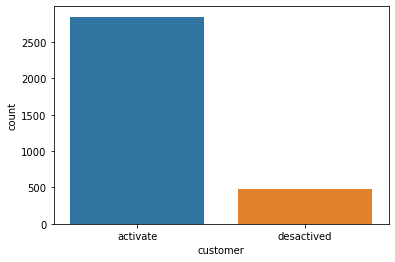

In [147]:
# There are 2850 samples to the class 0 (customer activate)
# and 483 samples to the class 1 (customer deactivated)
sns.countplot(data = df, x = df['customer'])
plt.show()

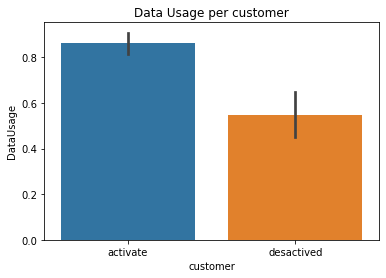

In [148]:
# Data Usage per customer
sns.barplot(data = df,x = 'customer', y = 'DataUsage')
plt.title('Data Usage per customer')
plt.show()

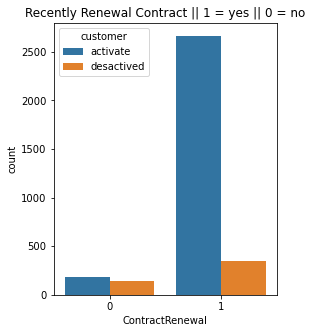

In [149]:
#The majority of active customers did recent renewal contract
plt.figure(figsize = (4,5))
sns.countplot(data=df, x="ContractRenewal", hue="customer")
plt.title("Recently Renewal Contract || 1 = yes || 0 = no")
plt.show()

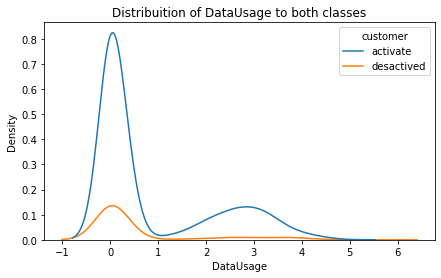

In [150]:
# Distribuition of DataUsage to both classes
plt.figure(figsize = (7,4))
sns.kdeplot(data=df, x="DataUsage", hue="customer")
plt.title('Distribuition of DataUsage to both classes')
plt.show()

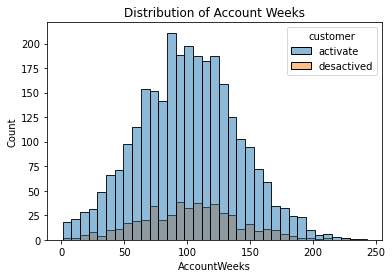

In [314]:
# the distribution number of weeks customer is active in both classes is similar, with a density of around 100
sns.histplot(data = df, x = df['AccountWeeks'], hue = df['customer'])
plt.title('Distribution of Account Weeks')
plt.show()

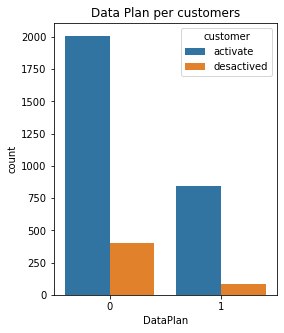

In [152]:
#Customers has the Data Plan
plt.figure(figsize = (4,5))
sns.countplot(data=df, x="DataPlan", hue="customer")
plt.title('Data Plan per customers')
plt.show()

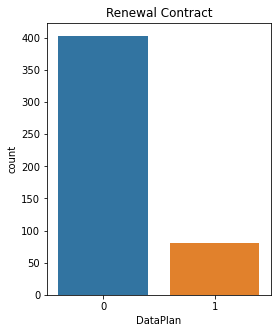

In [90]:
# Among customers who deactivated, most didn't have a data plan
plt.figure(figsize = (4,5))
sns.countplot(data=df[df['Churn'] == 1], x="DataPlan")
plt.title('Renewal Contract')
plt.show()


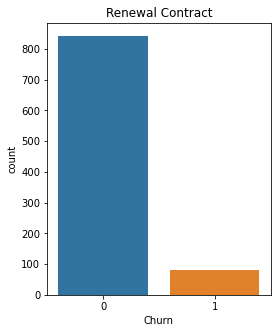

In [107]:
#Among the customers has Data Plan, only 10% deactivated the service
# So Data Plan can be a strategy to retain customer
plt.figure(figsize = (4,5))
sns.countplot(data=df[df['DataPlan'] == 1], x="Churn")
plt.title('Renewal Contract')
plt.show()

In [155]:
# Feature Selection using the Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

In [165]:
x = df.drop(['Churn', 'customer'], axis = 1).values
y = df['Churn'].values

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [167]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [172]:
# columns of train
features = df.drop(['Churn', 'customer'], axis = 1).columns

<BarContainer object of 10 artists>

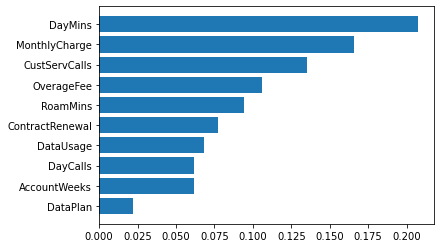

In [173]:
# graph feature importances
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

In [176]:
rfe = RFECV(rf,cv=5,scoring="accuracy")
rfe.fit(x_train,y_train)

RFECV(cv=5, estimator=RandomForestClassifier(), scoring='accuracy')

In [181]:
selected_features = np.array(features)[rfe.get_support()]

In [182]:
# selected features, no ones was withdrawn
selected_features

array(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge',
       'OverageFee', 'RoamMins'], dtype=object)

In [194]:
from sklearn.preprocessing import StandardScaler

In [197]:
# some algorithms need to data scaled
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform (x_train)
x_test_scaled = scaler.fit_transform (x_test)

In [193]:
# build models 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [201]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [202]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [203]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [251]:
gboost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.07)
gboost.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.07)

In [256]:
naive_bayers = GaussianNB()
naive_bayers.fit(x_train, y_train)

GaussianNB()

In [257]:
# predictions
pred_random_forest = random_forest.predict(x_test)
pred_knn = knn.predict(x_test_scaled)
pred_logistic = logistic.predict(x_test)
pred_gboost = gboost.predict(x_test)
pred_naive_bayers = naive_bayers.predict(x_test)

In [265]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [258]:
print(f'random forest accuracy: {accuracy_score(y_test, pred_random_forest)}')
print(f'knn accuracy: {accuracy_score(y_test, pred_knn)}')
print(f'logistic regression accuracy: {accuracy_score(y_test, pred_logistic)}')
print(f'gradient boosting accuracy: {accuracy_score(y_test, pred_gboost)}')
print(f'naive bayers accuracy {accuracy_score(y_test, pred_naive_bayers)}')

random forest accuracy: 0.9220389805097451
knn accuracy: 0.8995502248875562
logistic regression accuracy: 0.8455772113943029
gradient boosting accuracy: 0.9340329835082459
naive bayers accuracy 0.8395802098950524


In [309]:
tr_random_forest = random_forest.predict(x_train)
tr_knn = knn.predict(x_train_scaled)
tr_logistic = logistic.predict(x_train)
tr_gboost = gboost.predict(x_train)
tr_naive_bayers = naive_bayers.predict(x_train)

print(f'random forest accuracy: {accuracy_score(y_train, tr_random_forest)}')
print(f'knn accuracy: {accuracy_score(y_train, tr_knn)}')
print(f'logistic regression accuracy: {accuracy_score(y_train, tr_logistic)}')
print(f'gradient boosting accuracy: {accuracy_score(y_train, tr_gboost)}')
print(f'naive bayers accuracy: {accuracy_score(y_train, tr_naive_bayers)}')


random forest accuracy: 1.0
knn accuracy: 0.9197299324831207
logistic regression accuracy: 0.8567141785446362
gradient boosting accuracy: 0.9527381845461366
naive bayers accuracy: 0.8518379594898725


              precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.83      0.61      0.70       101

    accuracy                           0.92       667
   macro avg       0.88      0.80      0.83       667
weighted avg       0.92      0.92      0.92       667

[[553  13]
 [ 39  62]]


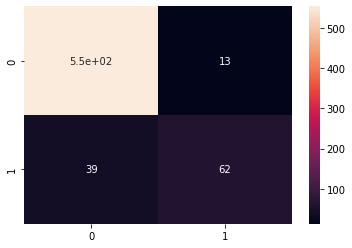

In [277]:
# acc of random forest was 92%, but the precision to class 1 is only 83%
cm=confusion_matrix(y_test, pred_random_forest)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, pred_random_forest))
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.88      0.65      0.75       101

    accuracy                           0.93       667
   macro avg       0.91      0.82      0.86       667
weighted avg       0.93      0.93      0.93       667

[[557   9]
 [ 35  66]]


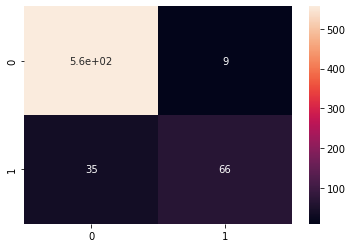

In [278]:
# the precision of gradient boosting to class 1 is the best between models 88%
cm=confusion_matrix(y_test, pred_gboost)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, pred_gboost))
print(cm)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       566
           1       0.83      0.43      0.56       101

    accuracy                           0.90       667
   macro avg       0.87      0.70      0.75       667
weighted avg       0.89      0.90      0.89       667

[[557   9]
 [ 58  43]]


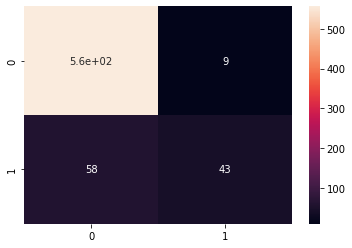

In [280]:
# there's an interesting fact here, the accuracy of random forest was 92% and of knn was 89%
# but when we make an analysis in precision, both models have 83%
cm=confusion_matrix(y_test, pred_knn)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, pred_knn))
print(cm)